In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"Analytic"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"Analytic.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"Analytic.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values, t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
data=total_dat.values
data=np.delete(data, 100, axis=0)

In [14]:
log_dat_x=np.log(data[:,:6])

In [15]:
log_dat_y=np.log(data[:,7])

In [16]:
x_train=log_dat_x

In [17]:
max_x=np.max(x_train, axis=0)

In [18]:
x_train=x_train/ max_x

In [19]:
max_y=np.max(log_dat_y)

In [20]:
y_train=log_dat_y/max_y

In [21]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [22]:
nb_epochs = 1000
model=nn.Linear(6,1)
val=0.001
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    regularity =  torch.norm(model.weight, p=1)
    loss = F.mse_loss(prediction, y_train)
    cost = loss + val*regularity
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
              epoch, nb_epochs, cost.item()
          ))

Epoch    0/1000 Cost: 0.541112
Epoch  100/1000 Cost: 0.009575
Epoch  200/1000 Cost: 0.005891
Epoch  300/1000 Cost: 0.004347
Epoch  400/1000 Cost: 0.003602
Epoch  500/1000 Cost: 0.003207
Epoch  600/1000 Cost: 0.003012
Epoch  700/1000 Cost: 0.002909
Epoch  800/1000 Cost: 0.002855
Epoch  900/1000 Cost: 0.002827
Epoch 1000/1000 Cost: 0.002812


In [23]:
x=np.squeeze(model(x_train).detach().numpy())

In [24]:
y=y_train.detach().numpy()

MSE: 0.002109118737280369
RMSE: 0.0459251427573216
Percentage error: 5.446099839748886 %


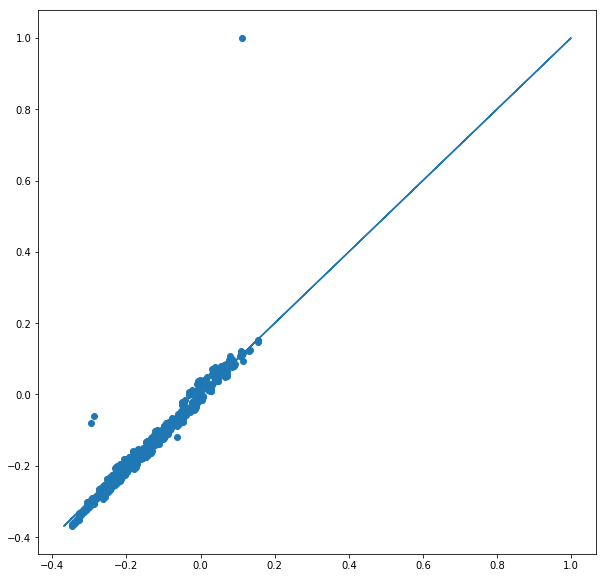

In [25]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show
print('MSE:',loss.item())
print('RMSE:', np.sqrt(loss.item()))
print('Percentage error:', (np.exp(np.sqrt(cost.item()))-1)*100,'%')

In [26]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1524, -0.0469, -0.0145, -0.0006, -0.0669, -0.4218]],
       requires_grad=True), Parameter containing:
tensor([0.3691], requires_grad=True)]


In [27]:
out_lier_index=np.nonzero(np.square(x-y)>0.01)
print(out_lier_index)

(array([ 10, 268, 412]),)


In [28]:
out_liers=np.zeros((3,8))

In [29]:
for i in range(3):
    out_liers[i]=data[out_lier_index[0][i],:]

In [30]:
pd.DataFrame(out_liers,columns=total_dat.columns)

,# of turns,permittivity(sur),LS/LW,SEP,permittivity(sub),OD,HFSS,Analytic
0,2.0,1.0,0.1,0.3,8.0,2.0,2.877300,25434.00000
1,3.0,30.0,0.3,0.6,8.0,32.0,0.032700,0.44497
2,4.0,30.0,0.3,0.6,2.2,32.0,0.050364,0.54049


In [31]:
data=np.delete(data, 412, axis=0)
data=np.delete(data, 268, axis=0)
data=np.delete(data, 10, axis=0)

In [32]:
log_dat_x=np.log(data[:,:6])
log_dat_y=np.log(data[:,7])
x_train=log_dat_x
max_x=np.max(x_train, axis=0)
x_train=x_train/ max_x
max_y=np.max(log_dat_y)
y_train=log_dat_y/max_y
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [33]:
nb_epochs = 1000
model=nn.Linear(6,1)
val=0.001
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    regularity =  torch.norm(model.weight, p=1)
    loss = F.mse_loss(prediction, y_train)
    cost = loss + val*regularity
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
              epoch, nb_epochs, cost.item()
          ))

Epoch    0/1000 Cost: 1.379279
Epoch  100/1000 Cost: 0.112404
Epoch  200/1000 Cost: 0.061135
Epoch  300/1000 Cost: 0.037535
Epoch  400/1000 Cost: 0.025160
Epoch  500/1000 Cost: 0.018595
Epoch  600/1000 Cost: 0.015082
Epoch  700/1000 Cost: 0.013198
Epoch  800/1000 Cost: 0.012184
Epoch  900/1000 Cost: 0.011638
Epoch 1000/1000 Cost: 0.011343


MSE: 0.006537947803735733
RMSE: 0.08085757728089392
Percentage error: 11.238352839993837 %


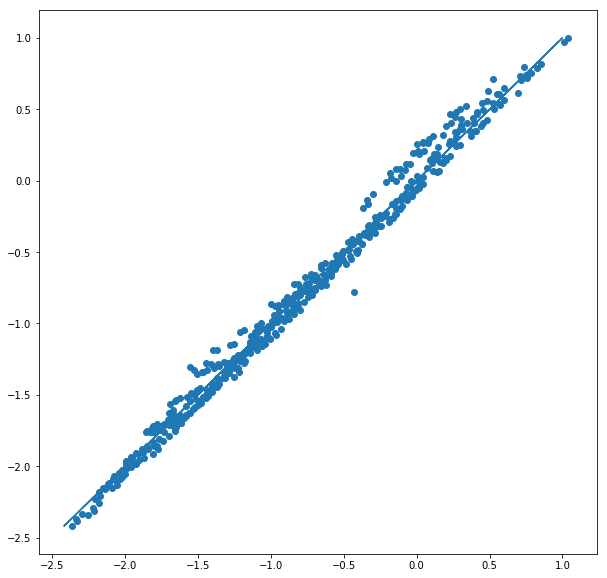

In [34]:
x=np.squeeze(model(x_train).detach().numpy())
y=y_train.detach().numpy()
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show
print('MSE:',loss.item())
print('RMSE:', np.sqrt(loss.item()))
print('Percentage error:', (np.exp(np.sqrt(cost.item()))-1)*100,'%')

In [35]:
predicted=np.exp(x*max_y)
HFSS=data[:,6]
Analytic=data[:,7]

MSE_Predicted: 0.016113409151699357
RMSE_Predicted: 0.12693860386698508
Percentage error_Predicted: 9.350822556632094 %
MSE_Predicted: 0.03649803018862795
RMSE_Predicted: 0.19104457644389686
Percentage error_HFSS: 17.2739773872769 %


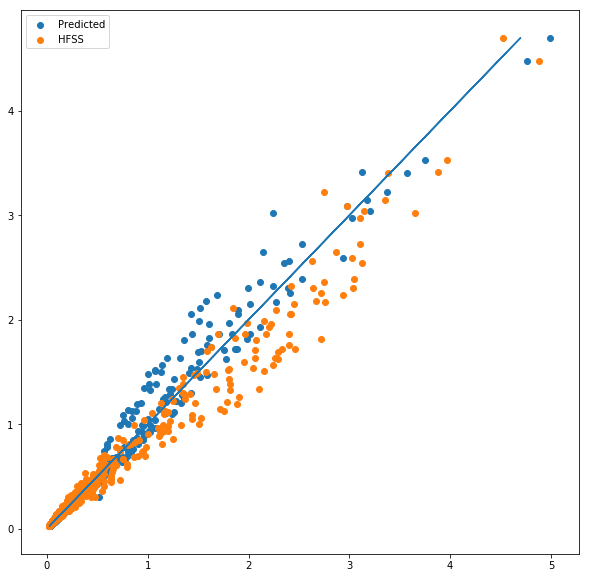

In [43]:
plt.figure(figsize=(10,10))
plt.plot(Analytic,Analytic)
plt.scatter(predicted, Analytic,label='Predicted')
plt.scatter(HFSS, Analytic,label='HFSS')
plt.legend()
plt.show
print('MSE_Predicted:',np.linalg.norm(predicted-Analytic)**2/len(Analytic))
print('RMSE_Predicted:', np.sqrt(np.linalg.norm(predicted-Analytic)**2/len(Analytic)))
print('Percentage error_Predicted:', np.sum(np.abs(predicted-Analytic)/Analytic)/len(Analytic)*100,'%')
print('MSE_Predicted:',np.linalg.norm(HFSS-Analytic)**2/len(Analytic))
print('RMSE_Predicted:', np.sqrt(np.linalg.norm(HFSS-Analytic)**2/len(Analytic)))
print('Percentage error_HFSS:', np.sum(np.abs(HFSS-Analytic)/Analytic)/len(Analytic)*100,'%')